In [98]:
# Gerekli kütüphanelerin yüklenmesi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [99]:
df=pd.read_csv('diabetes.csv') #Veri setini yükleme

In [100]:
df.head(3) #İlk 3 satırın gösterilmesi

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


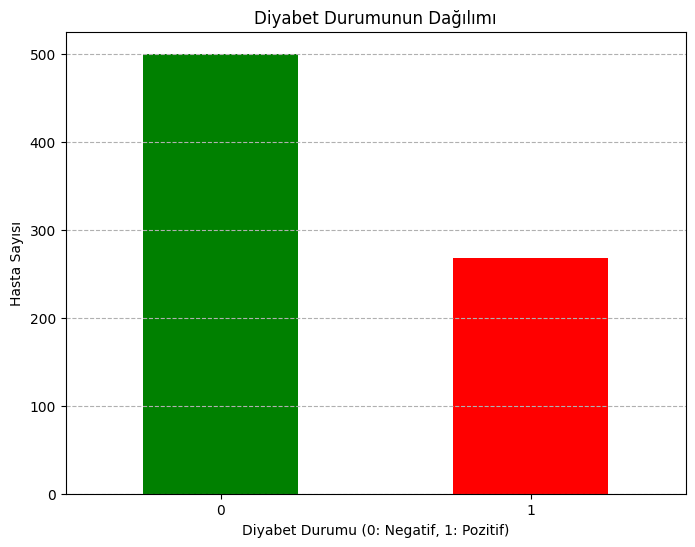

In [101]:
# 'Outcome' sütununun değerlerine göre dağılımı hesaplama
outcome_counts = df['Outcome'].value_counts()

# Çubuk grafik oluşturma
plt.figure(figsize=(8, 6))
outcome_counts.plot(kind='bar',color=['green','red'])
plt.title('Diyabet Durumunun Dağılımı')
plt.xlabel('Diyabet Durumu (0: Negatif, 1: Pozitif)')
plt.ylabel('Hasta Sayısı')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

In [102]:
df.info() #Veri setindeki değerler hakkında bilgi almak için

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [103]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [104]:
df.eq(0).sum() #Her bir özellikte kaç tane 0 var

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [105]:
df.shape #Satır sütun sayısı

(768, 9)

In [106]:
df[[
    'Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'
   ]] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN)

In [107]:
# Eksik değerlerin doldurulması
df.fillna(df.mean(), inplace = True)

In [108]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1


In [109]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [110]:
df.eq(0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

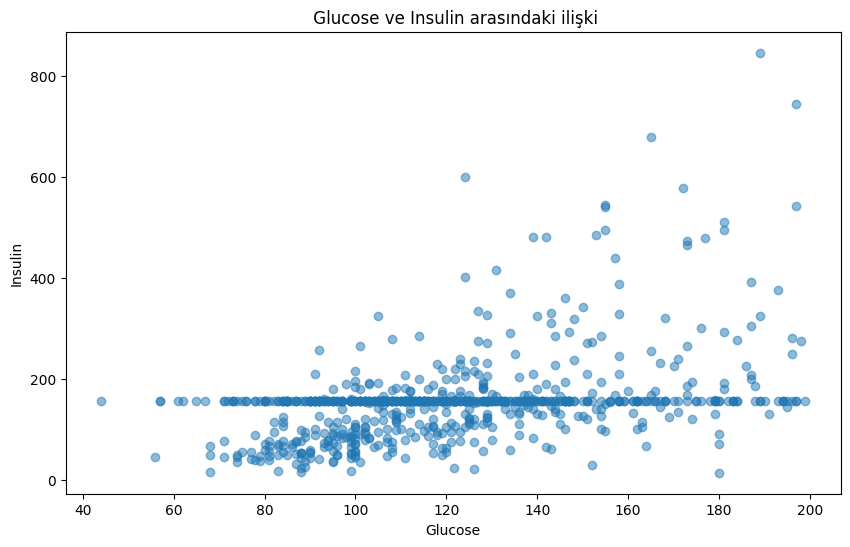

In [111]:
plt.figure(figsize=(10, 6))
# Nokta grafiği oluşturma
plt.scatter(df['Glucose'], df['Insulin'], alpha=0.5)
plt.title(' Glucose ve Insulin arasındaki ilişki')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()

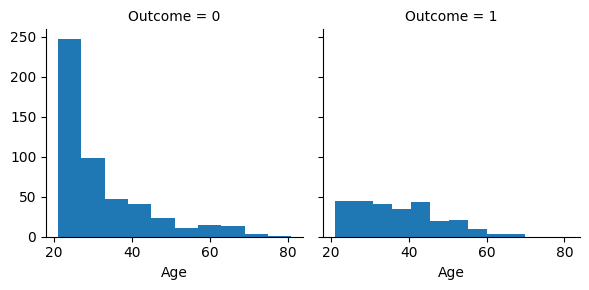

In [112]:
age=sns.FacetGrid(df,col='Outcome')
age.map(plt.hist,'Age')
plt.show()

In [22]:
# Normalizasyonu
normalized_df = (df - df.min()) / (df.max() - df.min())
print(normalized_df.head(6))

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.670968       0.489796       0.304348  0.170130  0.314928   
1     0.058824  0.264516       0.428571       0.239130  0.170130  0.171779   
2     0.470588  0.896774       0.408163       0.240798  0.170130  0.104294   
3     0.058824  0.290323       0.428571       0.173913  0.096154  0.202454   
4     0.000000  0.600000       0.163265       0.304348  0.185096  0.509202   
5     0.294118  0.464516       0.510204       0.240798  0.170130  0.151329   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333      1.0  
1                  0.116567  0.166667      0.0  
2                  0.253629  0.183333      1.0  
3                  0.038002  0.000000      0.0  
4                  0.943638  0.200000      1.0  
5                  0.052519  0.150000      0.0  


In [113]:
# Giriş ve çıktı değişkenlerini ayırma
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# PCA uygulama
pca = PCA(n_components=2)  # İlk iki ana bileşeni alacağız
X_pca = pca.fit_transform(X)

# LDA uygulama
lda = LDA(n_components=1)  # Sadece 1 bileşen kullanılabilir
X_lda = lda.fit_transform(X, y)

# PCA ve LDA sonuçlarını yazdır
print("PCA Açıklanan Varyans Oranı:", pca.explained_variance_ratio_)
print("LDA Açıklanan Varyans Oranı:", lda.explained_variance_ratio_ if hasattr(lda, 'explained_variance_ratio_') else "LDA varyans oranı mevcut değil")

# PCA bileşen yüklerini analiz etme
pca_components = pca.components_
pca_feature_importance = pd.DataFrame(pca_components, columns=X.columns, index=['PC1', 'PC2'])
print(pca_feature_importance.abs().sort_values(by='PC1', axis=1, ascending=False))

PCA Açıklanan Varyans Oranı: [0.86510267 0.0891348 ]
LDA Açıklanan Varyans Oranı: [1.]
      Insulin   Glucose       Age  SkinThickness       BMI  BloodPressure  \
PC1  0.985616  0.165759  0.020800       0.017170  0.014227       0.012169   
PC2  0.168513  0.968188  0.121365       0.052047  0.048970       0.118503   

     Pregnancies  DiabetesPedigreeFunction  
PC1     0.002510                  0.000402  
PC2     0.018291                  0.001199  


In [114]:
# Bağımsız (X) ve bağımlı (y) değişkenlerin ayrılması
X = df.drop('Outcome', axis=1)  # 'Outcome' sütunu bağımlı değişken, geri kalan her şey bağımsız değişken
y = df['Outcome']

# Veri setinin eğitim ve test kümelerine ayrılması
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)# %70 eğitim, %30 test

# Çoklu Doğrusal Regresyon modelinin oluşturulması
model = LinearRegression()

# Modelin eğitim veri seti üzerinde eğitilmesi
model.fit(X_train, y_train)

# Test veri seti üzerinde tahminlerin yapılması
y_pred = model.predict(X_test)

# Performans metriklerinin hesaplanması
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Performans metriklerinin yazdırılması
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.174317237562553
R^2 Score: 0.2299882356311762


In [115]:
# Veri setini yükleme
df = pd.read_csv('diabetes.csv')

# Yeni özellik oluşturma: BMI ve insulin özelliklerinin çarpımı
df['BMI_Insulin_product'] = df['BMI'] * df['Insulin']

# Bağımsız (X) ve bağımlı (y) değişkenlerin ayrılması
X = df.drop('Outcome', axis=1)  # 'Outcome' sütunu bağımlı değişken, geri kalan her şey bağımsız değişken
y = df['Outcome']

# Veri setini eğitim ve test alt kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Lojistik Regresyon modelini oluşturma ve eğitme
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Test kümesi için tahmin yapma
y_pred = logistic_model.predict(X_test)

# Doğruluk skoru hesaplama
accuracy = accuracy_score(y_test, y_pred)
print("Test Kümesi Doğruluk Skoru (Lojistik Regresyon):", accuracy)

Test Kümesi Doğruluk Skoru (Lojistik Regresyon): 0.7402597402597403


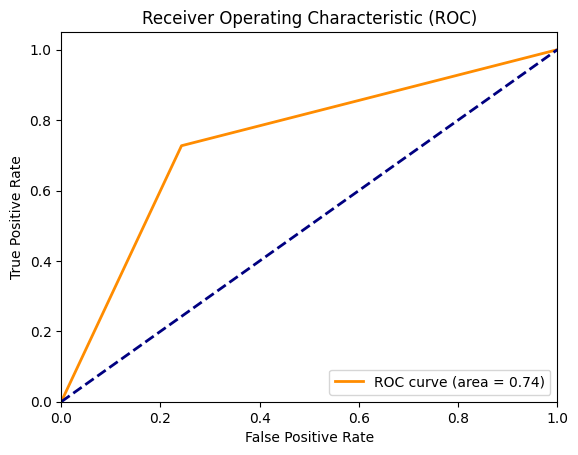

In [125]:
# y_test = ...  # Gerçek etiketler
# y_pred = ...  # Modelinizin tahminleri

# Sınıf olasılıkları
y_pred_proba = model.predict_proba(X_test)

# ROC Eğrisi ve AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])  # Pozitif sınıfın olasılıkları
roc_auc = auc(fpr, tpr)

# ROC Eğrisini çizme
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [116]:
# Veri setini yükleme
df = pd.read_csv('diabetes.csv')

# Bağımsız (X) ve bağımlı (y) değişkenlerin ayrılması
X = df.drop('Outcome', axis=1)  # 'Outcome' sütunu bağımlı değişken, geri kalan her şey bağımsız değişken
y = df['Outcome']

# Veri setini eğitim ve test alt kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # %70 eğitim, %30 test

# Multinominal Lojistik Regresyon modelini oluşturma ve eğitme
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Katsayıları raporlama
logistic_coefficients = logistic_model.coef_
print("Multinominal Lojistik Regresyon Katsayıları:")
for i, coef in enumerate(logistic_coefficients[0]):
    print(f'Özellik {i+1}: {coef}')

# Test kümesi için tahmin yapma
y_pred = logistic_model.predict(X_test)

# Doğruluk skoru hesaplama
accuracy = accuracy_score(y_test, y_pred)
print("\nTest Kümesi Doğruluk Skoru:", accuracy)


Multinominal Lojistik Regresyon Katsayıları:
Özellik 1: 0.05775370825652713
Özellik 2: 0.035901940060149184
Özellik 3: -0.010866290433283063
Özellik 4: -0.001416711651047428
Özellik 5: -0.0009840305626580984
Özellik 6: 0.10909510408853519
Özellik 7: 0.3741512518981942
Özellik 8: 0.036019157624229074

Test Kümesi Doğruluk Skoru: 0.7359307359307359


In [117]:
# Özellikleri standartlaştırma
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Multinomial Lojistik Regresyon modelini oluşturma ve eğitme
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Model katsayılarını yazdırma
print("Model katsayıları (intercept ve coef):")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Test kümesi üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Performans metriklerini hesaplama ve yazdırma
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model katsayıları (intercept ve coef):
Intercept: [-0.43000419]
Coefficients: [[ 0.09741379  0.56675123 -0.10208571 -0.01223917 -0.05470839  0.42416132
   0.06970077  0.20963226]]
Confusion Matrix:
[[120  31]
 [ 30  50]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [118]:
# Veri setini yükleme
df = pd.read_csv('diabetes.csv')

# Bağımsız (X) ve bağımlı (y) değişkenlerin ayrılması
X = df.drop('Outcome', axis=1)  # 'Outcome' sütunu bağımlı değişken, geri kalan her şey bağımsız değişken
y = df['Outcome']

# 10 kez Holdout yöntemi ile test etme
for i in range(10):
    # Veri setini eğitim ve test alt kümelerine ayırma
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)  # Random_state değişiyor

    # Lojistik Regresyon modelini oluşturma ve eğitme
    logistic_model = LogisticRegression(max_iter=1000)
    logistic_model.fit(X_train, y_train)

    # Test kümesi için tahmin yapma
    y_pred = logistic_model.predict(X_test)

    # Doğruluk skoru hesaplama ve yazdırma
    accuracy = accuracy_score(y_test, y_pred)
    print("Test", i+1, "Doğruluk Skoru:", accuracy)

Test 1 Doğruluk Skoru: 0.7792207792207793
Test 2 Doğruluk Skoru: 0.7835497835497836
Test 3 Doğruluk Skoru: 0.7489177489177489
Test 4 Doğruluk Skoru: 0.7532467532467533
Test 5 Doğruluk Skoru: 0.8095238095238095
Test 6 Doğruluk Skoru: 0.7835497835497836
Test 7 Doğruluk Skoru: 0.7662337662337663
Test 8 Doğruluk Skoru: 0.7792207792207793
Test 9 Doğruluk Skoru: 0.7792207792207793
Test 10 Doğruluk Skoru: 0.7445887445887446


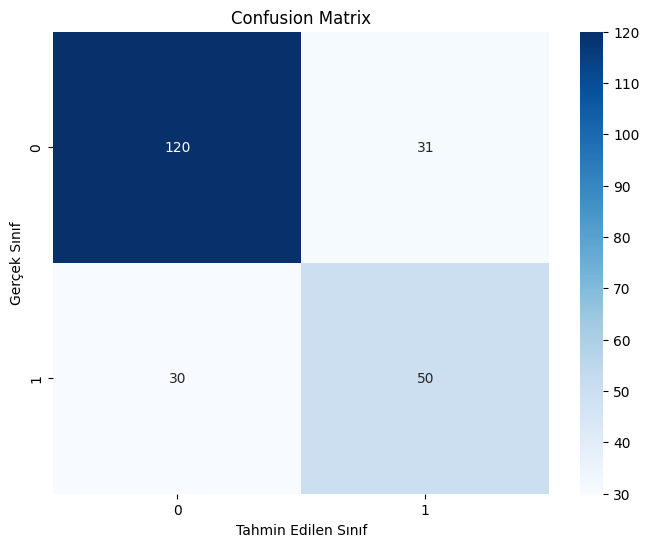

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Veri setini yükleme
df = pd.read_csv('diabetes.csv')

# Bağımsız (X) ve bağımlı (y) değişkenlerin ayrılması
X = df.drop('Outcome', axis=1)  # 'Outcome' sütunu bağımlı değişken, geri kalan her şey bağımsız değişken
y = df['Outcome']

# Veri setini eğitim ve test alt kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # %70 eğitim, %30 test

# Lojistik Regresyon modelini oluşturma ve eğitme
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Test kümesi üzerinde tahmin yapma
y_pred = logistic_model.predict(X_test)

# Karmaşıklık matrisini hesaplama
conf_matrix = confusion_matrix(y_test, y_pred)

# Karmaşıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()


Accuracy: 0.7012987012987013

Confusion Matrix:
 [[107  44]
 [ 25  55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.71      0.76       151
           1       0.56      0.69      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.70      0.71       231



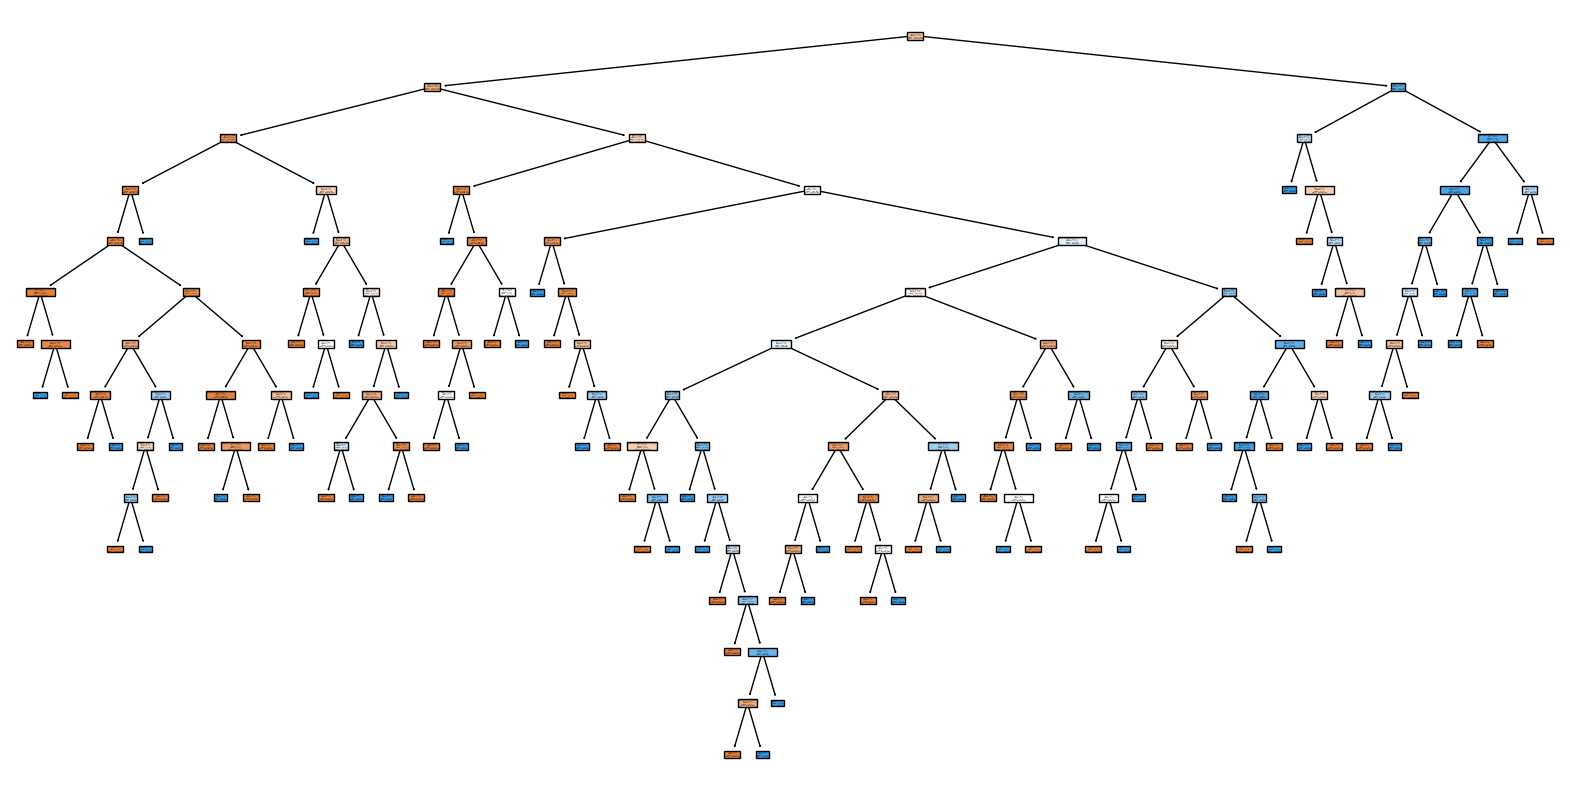

In [131]:
from sklearn.tree import plot_tree
df = pd.read_csv('diabetes.csv')

# Giriş ve çıktı değişkenlerini ayırma
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Veri setini eğitim ve test alt kümelerine bölmek
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Karar ağaçları modelini oluşturma ve eğitme
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Tahmin yapma
y_pred = model.predict(X_test)

# Performans metriklerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Ağaç yapısını görselleştirme
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.show()



In [129]:
# Bağımsız değişkenlerin ve hedef değişkenin belirlenmesi için kullanıyoruz.
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes sınıflandırıcısını oluşturma ve eğitme
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Eğitim seti üzerinde modeli değerlendirme
y_train_pred = nb_classifier.predict(X_train)

# Test seti üzerinde modeli değerlendirme
y_test_pred = nb_classifier.predict(X_test)

# Performans metriklerini hesaplama
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

# Sonuçları raporlama
print("Eğitim seti doğruluğu:", train_accuracy)
print("Test seti doğruluğu:", test_accuracy)
print("\nKarışıklık Matrisi:\n", conf_matrix)
print("\nSınıflandırma Raporu:\n", class_report)

Eğitim seti doğruluğu: 0.7672253258845437
Test seti doğruluğu: 0.7445887445887446

Karışıklık Matrisi:
 [[119  32]
 [ 27  53]]

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231

